In [1]:
import pandas as pd

In [2]:
#define the column names
CSV_COLUMNS = ['age','gender','polyuria','polydipsia','sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring','itching','irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"

full_dataset = pd.read_csv(URL,
                           header = 0,
                           names = CSV_COLUMNS)

In [3]:
full_dataset.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

In [5]:
for colname in ['gender','polyuria','polydipsia','sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring','itching','irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']:
    full_dataset[colname] = pd.Categorical(full_dataset[colname])
    full_dataset[colname] = full_dataset[colname].cat.codes

In [6]:
from sklearn import preprocessing
import numpy as np

X = full_dataset.iloc[:,0:(len(full_dataset.columns) - 1)]
X = np.asarray(X).astype(np.float32)
Y = full_dataset.iloc[:,len(full_dataset.columns) - 1]
encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

def build_dnn_model():
    # create model
    model = tf.keras.models.Sequential()
    model.add(Dense(34,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
    return model

In [8]:
import tensorflow as tf
from sklearn import model_selection

estimator = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_dnn_model, epochs=400, batch_size=10)
kfold = model_selection.StratifiedKFold(n_splits=4, shuffle=True)
history = model_selection.cross_val_score(estimator, X, encoded_Y, cv=kfold, verbose = 2)
print("Accuracy: %.2f%% (%.2f%%)" % (history.mean()*100, history.std()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/400
39/39 [==============================] - 1s 1ms/step - loss: 0.9256 - accuracy: 0.5076
Epoch 2/400
39/39 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8355
Epoch 3/400
39/39 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8994
Epoch 4/400
39/39 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.8857
Epoch 5/400
39/39 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8681
Epoch 6/400
39/39 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.8795
Epoch 7/400
39/39 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.8991
Epoch 8/400
39/39 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.8945
Epoch 9/400
39/39 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9182
Epoch 10/400
39/39 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.9358
Epoch 11/

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.3s remaining:    0.0s


39/39 [==============================] - 0s 1ms/step - loss: 0.8438 - accuracy: 0.5727
Epoch 2/400
39/39 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.6722
Epoch 3/400
39/39 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8189
Epoch 4/400
39/39 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8830
Epoch 5/400
39/39 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7462
Epoch 6/400
39/39 [==============================] - 0s 1ms/step - loss: 0.2375 - accuracy: 0.9065
Epoch 7/400
39/39 [==============================] - 0s 1ms/step - loss: 0.2492 - accuracy: 0.8910
Epoch 8/400
39/39 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.9051
Epoch 9/400
39/39 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9179
Epoch 10/400
39/39 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.9154
Epoch 11/400
39/39 [=

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min finished


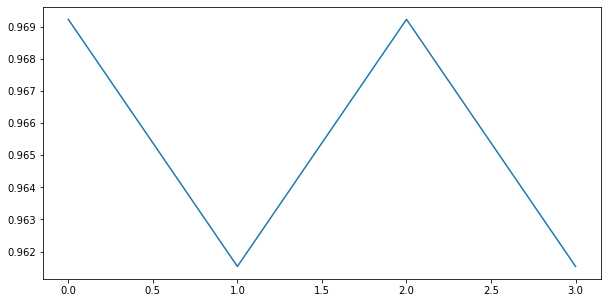

In [9]:
# Plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.plot(history)